# Getting started with Titanic Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

Brief information regarding train data:

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train = train.drop(['PassengerId', 'Ticket'], axis=1)

In [5]:
test = test.drop(['PassengerId', 'Ticket'], axis=1)

In [6]:
combined = pd.concat([train.drop(['Survived'], axis=1), test])

In [7]:
combined.shape

(1309, 9)

# Visualizing the data

In [8]:
%matplotlib inline
import seaborn as sns

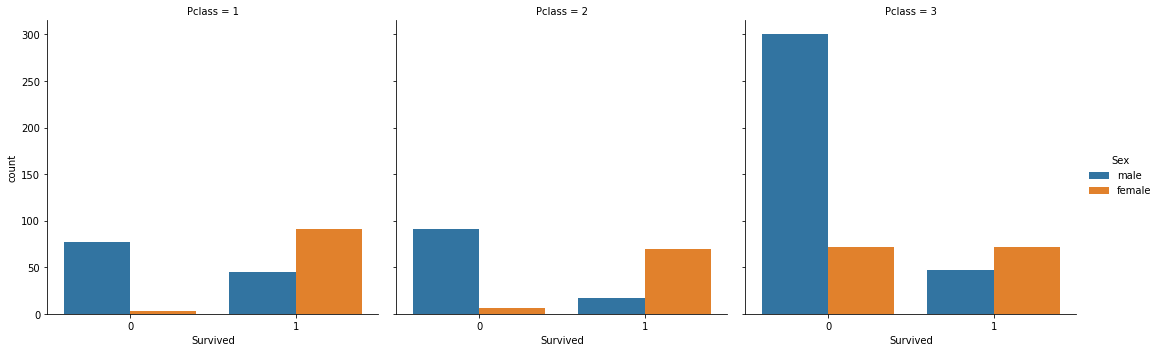

In [9]:
g = sns.catplot("Survived", col="Pclass", hue="Sex", col_wrap=3,
                data=train, kind="count")

How many people are survived in the first class?

In [10]:
for klass in range(1, 4):
    print('Class: ', klass, 'Survived: ', sum(train[train.Pclass==klass].Survived), 'Not survived: ', sum(train[train.Pclass==klass].Survived==0))

Class:  1 Survived:  136 Not survived:  80
Class:  2 Survived:  87 Not survived:  97
Class:  3 Survived:  119 Not survived:  372


# Feature engeneering

In [11]:
list(combined.keys())

['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

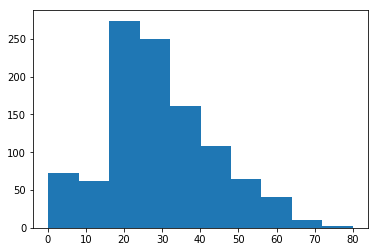

In [12]:
plt.hist(combined.Age[combined.Age.isnull()==False])

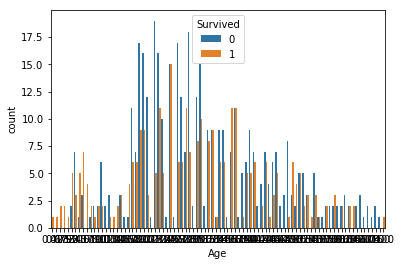

In [13]:
sns.countplot(x='Age', hue='Survived', data=train)

In [14]:
def parse_name(s):
    a, b = s.split(',')
    family_name = a.strip()
    title = b.split('.')[0].strip()
    first_name = b.split('.')[1].split()[0].strip()
    return (first_name, title, family_name)
    

In [15]:
all_titles = map(lambda x: x[1], train.Name.apply(parse_name))

In [16]:
from collections import Counter
Counter(all_titles)


Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1})

In [17]:
train['title'] = train.Name.apply(lambda x: parse_name(x)[1])
train['first_name'] = train.Name.apply(lambda x: parse_name(x)[0]) 
train['family_name'] = train.Name.apply(lambda x: parse_name(x)[-1])
test['title'] = test.Name.apply(lambda x: parse_name(x)[1])
test['first_name'] = test.Name.apply(lambda x: parse_name(x)[0]) 
test['family_name'] = test.Name.apply(lambda x: parse_name(x)[-1])
combined['title'] = combined.Name.apply(lambda x: parse_name(x)[1])
combined['first_name'] = combined.Name.apply(lambda x: parse_name(x)[0]) 
combined['family_name'] = combined.Name.apply(lambda x: parse_name(x)[-1])
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
combined = combined.drop(['Name'], axis=1)

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title,first_name,family_name
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,Owen,Braund
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,John,Cumings
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,Laina,Heikkinen
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,Jacques,Futrelle
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,William,Allen


In [19]:
from sklearn.preprocessing import LabelEncoder
def predict_nan_values(train, name, clf, variables=[], what=None):
    null_mask = train[name].isnull()
    if variables:
        _train = train[variables]
    else:
        _train = train.copy()
    y = _train[name][~null_mask]
    _train = _train.drop(name, axis=1)
    encoders = dict() # save encoders' states
    for key in list(_train.columns):
        if not pd.np.issubdtype(_train[key].dtype, pd.np.number):
            _train.loc[_train[key].isnull(), key]  = 'NNN'
            le = LabelEncoder()
            le.fit(_train[key])
            _train[key] = le.transform(_train[key])
            encoders[key] = le
        else:
            _train['%s_nan' % key] = 0.0
            _train.loc[_train[key].isnull(), '%s_nan' % key] = 1.0
            _train.loc[_train[key].isnull(), key] = -999.0
    clf.fit(_train[~null_mask], y)
    if what is not None:
        _what = what.copy()
        null_mask = _what[name].isnull()
        for key in _train.columns:
            if key not in _what.columns:
                _what.loc[:, key] = 0.0
        _what = _what[_train.columns]
        for key in encoders.keys():
            if not pd.np.issubdtype(_what[key].dtype, pd.np.number):
                _what.loc[_what[key].isnull(), key]  = 'NNN'
                _what[key] = encoders[key].transform(_what[key])
            else:
                _what['%s_nan' % key] = 0.0
                _what.loc[_what[key].isnull(), '%s_nan' % key] = 1.0
                _what.loc[_what[key].isnull(), key] = -999.0
        return clf.predict(_what[null_mask]) if any(null_mask) else None
    else:
        return clf.predict(_train[null_mask]) if any(null_mask) else None

## Load basic classifiers

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

/home/dmitry/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
train.loc[train.Age.isnull(), 'Age'] = predict_nan_values(combined, 'Age', RandomForestRegressor(n_estimators=100), what=train)

In [33]:
train.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'title', 'first_name', 'family_name'],
      dtype='object')

In [47]:
test.family_name.isnull().sum()

0